<a href="https://colab.research.google.com/github/BryanVerduga/Proyecto1_Verduga/blob/main/Tarea_3(series_de_tiempo%2Ccorregida).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bryan Verduga

**Ejercicios
Ahora que hemos aprendido cómo generar series de tiempo estacionarias y no estacionarias, y cómo comprobar su estacionariedad utilizando el test de Dickey-Fuller, es tu turno de practicar.**

Ejercicio 1:

Genera una serie de tiempo que sea una caminata aleatoria (es decir, cada valor es la suma del valor anterior y un ruido aleatorio), y comprueba si es estacionaria utilizando el test de Dickey-Fuller. Visualiza la serie de tiempo.


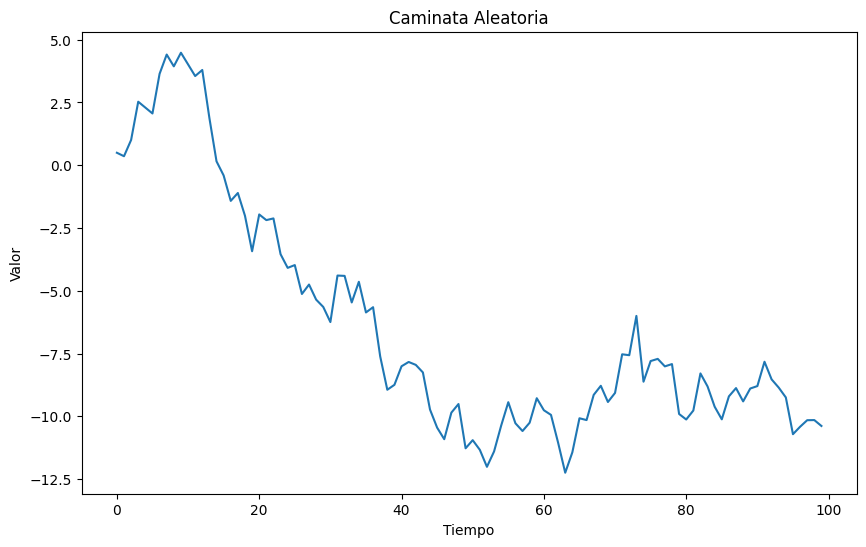

Estadística de prueba: -1.3583317659818992
Valor p: 0.6020814791099098
Valores críticos: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
Resultados del test:
La serie de tiempo no es estacionaria.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#generar una caminata aleatoria
np.random.seed(42)  #gijamos la semilla
n = 100  #numero de puntos en la serie de tiempo
random_noise = np.random.normal(0, 1, n)  #ruido aleatorio
random_walk = np.cumsum(random_noise)  #caminata aleatoria

#visualizar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(random_walk)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Caminata Aleatoria')
plt.show()

#realizar el test de Dickey-Fuller para verificar la estacionariedad
result = adfuller(random_walk)
print("Estadística de prueba:", result[0])
print("Valor p:", result[1])
print("Valores críticos:", result[4])
print("Resultados del test:")
print("La serie de tiempo es estacionaria.") if result[1] <= 0.05 else print("La serie de tiempo no es estacionaria.")



Ejercicio 2:

Genera una serie de tiempo que sea la suma de una tendencia y un ruido aleatorio, y comprueba si es estacionaria utilizando el test de Dickey-Fuller. Visualiza la serie de tiempo.

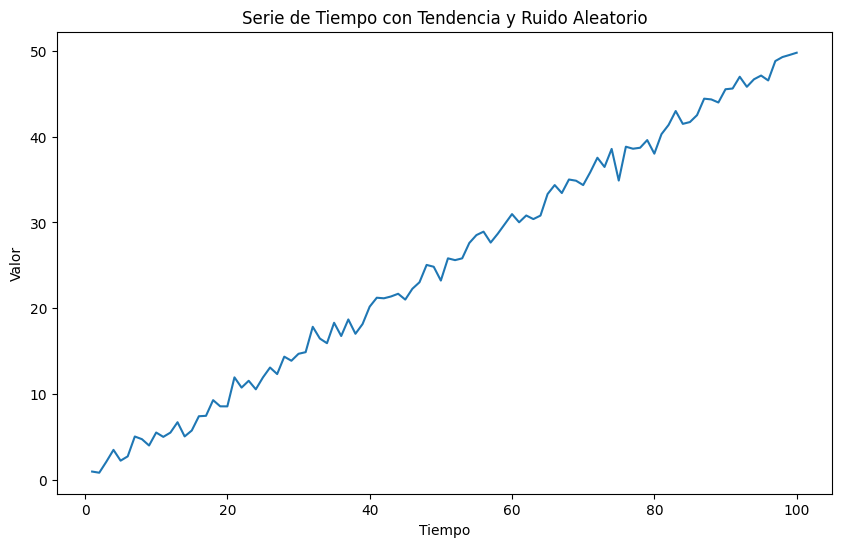

Estadística de prueba: 0.24807855546592397
Valor p: 0.9748328625999761
Valores críticos: {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}
Resultados del test:
La serie de tiempo no es estacionaria.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#generar una serie de tiempo con tendencia y ruido aleatorio
np.random.seed(42)  #fijamos semilla
n = 100  #numero de puntos en la serie de tiempo
t = np.arange(1, n + 1)  #vector de tiempo
tendencia = 0.5 * t  #tendencia lineal
random_noise = np.random.normal(0, 1, n)  #ruido aleatorio
serie_tiempo = tendencia + random_noise  #serie de tiempo

#visualizar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, serie_tiempo)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Serie de Tiempo con Tendencia y Ruido Aleatorio')
plt.show()

#realizar el test de Dickey-Fuller para verificar la estacionariedad
result = adfuller(serie_tiempo)
print("Estadística de prueba:", result[0])
print("Valor p:", result[1])
print("Valores críticos:", result[4])
print("Resultados del test:")
print("La serie de tiempo es estacionaria.") if result[1] <= 0.05 else print("La serie de tiempo no es estacionaria.")


**Ejercicios con Prophet
Ahora que hemos aprendido cómo usar Prophet para descomponer una serie de tiempo en su tendencia y componentes estacionales, es tu turno de practicar.**

Ejercicio 1:

Genera una serie de tiempo que tenga una tendencia lineal y una estacionalidad semanal, y utiliza Prophet para descomponerla en su tendencia y componentes estacionales. Visualiza la descomposición.


In [11]:
pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk4kw4aj/hdmn41xk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk4kw4aj/kxihyw6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47819', 'data', 'file=/tmp/tmpzk4kw4aj/hdmn41xk.json', 'init=/tmp/tmpzk4kw4aj/kxihyw6l.json', 'output', 'file=/tmp/tmpzk4kw4aj/prophet_model0iq7y_uk/prophet_model-20230731014935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:49:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


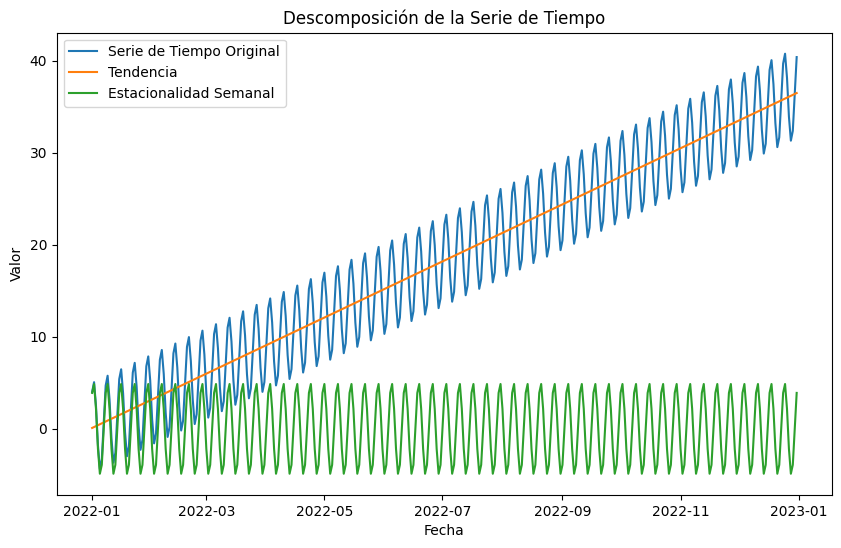

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

#generar una serie de tiempo con tendencia lineal y estacionalidad semanal
np.random.seed(42)  #fijamos semilla
n = 365  #numero de puntos en la serie de tiempo
t = pd.date_range(start='2022-01-01', periods=n, freq='D')  #fechas para la serie de tiempo
tendencia_lineal = 0.1 * np.arange(1, n + 1)  #tendencia lineal
estacionalidad_semanal = 5 * np.sin(2 * np.pi * np.arange(1, n + 1) / 7)  #estacionalidad semanal
serie_tiempo = tendencia_lineal + estacionalidad_semanal  #serie de tiempo

#crear un DataFrame con la serie de tiempo
data = pd.DataFrame({'ds': t, 'y': serie_tiempo})

#utilizar Prophet para descomponer la serie de tiempo
model = Prophet()
model.fit(data)

#predecir los componentes de la serie de tiempo
components = model.predict(data)

#visualizar la descomposición
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['ds'], data['y'], label='Serie de Tiempo Original')
ax.plot(data['ds'], components['trend'], label='Tendencia')
ax.plot(data['ds'], components['weekly'], label='Estacionalidad Semanal')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Descomposición de la Serie de Tiempo')
ax.legend()
plt.show()


Ejercicio 2:

Genera una serie de tiempo que tenga una tendencia no lineal y una estacionalidad diaria, y utiliza Prophet para descomponerla en su tendencia y componentes estacionales. Visualiza la descomposición.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk4kw4aj/855456e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzk4kw4aj/mubwgkhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5325', 'data', 'file=/tmp/tmpzk4kw4aj/855456e3.json', 'init=/tmp/tmpzk4kw4aj/mubwgkhv.json', 'output', 'file=/tmp/tmpzk4kw4aj/prophet_model59xu15uk/prophet_model-20230731014943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


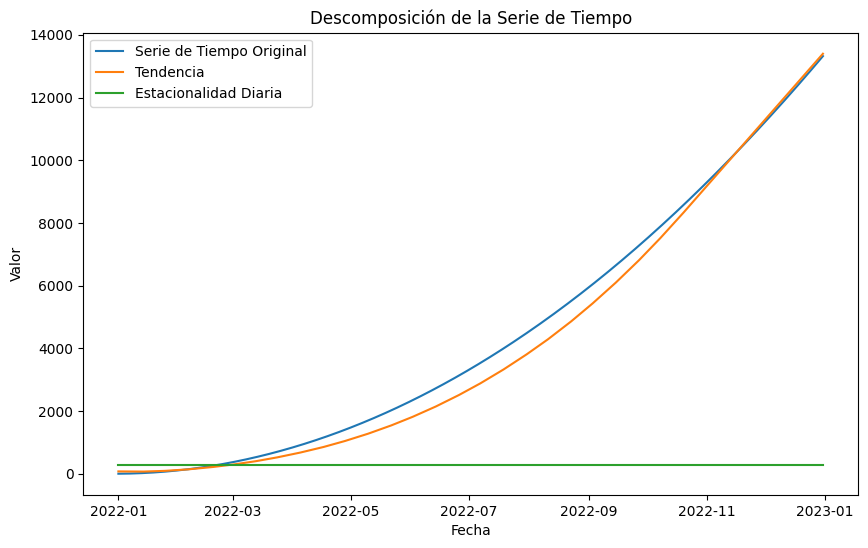

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Generar una serie de tiempo con tendencia no lineal y estacionalidad diaria
np.random.seed(42)  # Fijamos la semilla para reproducibilidad
n = 365  # Número de puntos en la serie de tiempo
t = pd.date_range(start='2022-01-01', periods=n, freq='D')  # Fechas para la serie de tiempo
tendencia_no_lineal = 0.1 * np.arange(1, n + 1) ** 2  # Tendencia no lineal (cuadrática)
estacionalidad_diaria = 10 * np.sin(2 * np.pi * np.arange(1, n + 1) / 365)  # Estacionalidad diaria
serie_tiempo = tendencia_no_lineal + estacionalidad_diaria  # Serie de tiempo

# Creamos un DataFrame con la serie de tiempo
data = pd.DataFrame({'ds': t, 'y': serie_tiempo})

# Utilizar Prophet para descomponer la serie de tiempo
model = Prophet(daily_seasonality=True, yearly_seasonality=True)  # Especificamos estacionalidad diaria y anual
model.fit(data)

# Predecir los componentes de la serie de tiempo
components = model.predict(data)

# Visualizar la descomposición
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['ds'], data['y'], label='Serie de Tiempo Original')
ax.plot(data['ds'], components['trend'], label='Tendencia')
ax.plot(data['ds'], components['daily'], label='Estacionalidad Diaria')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Descomposición de la Serie de Tiempo')
ax.legend()
plt.show()
